# 0. Start from here with Clean Dataset

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# define the path to your project directory
project_dir = '/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/cleaned_df'

# change the current working directory
%cd {project_dir}

/content/drive/.shortcut-targets-by-id/1gjNRQI-rOo6nT6aXX2rHB5aG--wP82vd/TECH-GB-2336-Data-Science-and-AI-for-Business/project/cleaned_df


In [3]:
# check how what csv files are in the folder
!ls {project_dir}

columns.txt		     order_test.csv   train_final.csv
olist_project.ipynb	     order_train.csv  x_test.csv.gz
orders_df_fully_cleaned.csv  test_final.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# load dataset
df_full = pd.read_csv('orders_df_fully_cleaned.csv')
df_test = pd.read_csv('order_test.csv')
df_train = pd.read_csv('order_train.csv')

In [8]:
df_test.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'deliver_diff', 'order_stage', 'carrier_stage', 'total_delivery_length',
       'isLate'],
      dtype='object')

In [7]:
# count values in customer_city
df_test['customer_city'].value_counts()

KeyError: 'customer_city'

# EDA

## 1. Customer Location

Workflow:
1. filtered only late delivered [isLate == 1] from full dataset
2. merge with customer database to see their location
3. visualize is there particular zipcode and city outstanding

In [ ]:
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_diff,order_stage,carrier_stage,total_delivery_length,isLate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.1,2.4,6.1,8.5,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.4,1.7,12.0,13.7,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.2,0.2,9.2,9.4,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,3.8,9.5,13.3,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.2,0.9,1.9,2.8,0


In [ ]:
df_full.describe()

,deliver_diff,order_stage,carrier_stage,total_delivery_length,isLate
count,96455.000000,96455.000000,96455.000000,96455.000000,96455.000000
mean,11.176824,3.227244,9.330262,12.557506,0.081126
std,10.183989,3.597893,8.760536,9.546196,0.273030
min,-189.000000,-171.200000,-16.100000,0.500000,0.000000
25%,6.400000,1.100000,4.100000,6.800000,0.000000
50%,11.900000,2.200000,7.100000,10.200000,0.000000
75%,16.200000,4.100000,12.000000,15.700000,0.000000
max,146.000000,125.800000,205.200000,209.600000,1.000000


In [ ]:
df_full.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'deliver_diff', 'order_stage', 'carrier_stage', 'total_delivery_length',
       'isLate'],
      dtype='object')

In [ ]:
# keep rows with only 'isLate' = 1
df_late = df_full[df_full['isLate'] == 1]
df_late

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_diff,order_stage,carrier_stage,total_delivery_length,isLate
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,-11.9,18.1,3.2,21.3,1
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-9.9,5.9,23.0,28.9,1
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,-0.0,3.3,27.1,30.4,1
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,-7.8,19.0,14.9,33.9,1
55,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-1.6,5.4,19.5,24.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96411,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,-5.0,12.8,5.3,18.1,1
96412,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,-3.8,0.9,22.0,22.9,1
96437,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,-21.7,4.8,35.0,39.8,1
96439,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,-2.0,1.1,19.2,20.3,1


In [ ]:
# load customer info data
df_customer = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# load geolocation data
df_location = pd.read_csv ('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_geolocation_dataset.csv')
df_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## 2. IsLate dataset

In [ ]:
# check 'customer_id' from df_late and 'customer_id' from df_customer is identical
df_late['customer_id'].isin(df_customer['customer_id']).value_counts()

,count
customer_id,
True,7825


In [ ]:
# left join df_late and df_customer using 'customer_id'
df_late_customer = pd.merge(df_late, df_customer, on='customer_id', how='left')
df_late_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_diff,order_stage,carrier_stage,total_delivery_length,isLate,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,-11.9,18.1,3.2,21.3,1,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-9.9,5.9,23.0,28.9,1,a25d5f94840d3c6a1a49f271ed83f4ec,21715,rio de janeiro,RJ
2,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,-0.0,3.3,27.1,30.4,1,92fd8aa5948e20c43a014c44c025c5e1,77480,alvorada,TO
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,-7.8,19.0,14.9,33.9,1,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-1.6,5.4,19.5,24.9,1,ddf60e20e6e262e2136801ce5cd628b0,49030,aracaju,SE


In [9]:
3589-27

3562

In [ ]:
# get the city for all zipcodes in df_late_customer
all_zipcode_city_mapping = df_late_customer.groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()

# display the mapping
display(all_zipcode_city_mapping)

{1009: 'sao paulo',
 1030: 'sao paulo',
 1037: 'sao paulo',
 1042: 'sao paulo',
 1043: 'sao paulo',
 1046: 'sao paulo',
 1050: 'sao paulo',
 1123: 'sao paulo',
 1127: 'sao paulo',
 1138: 'sao paulo',
 1140: 'sao paulo',
 1141: 'sao paulo',
 1150: 'sao paulo',
 1151: 'sao paulo',
 1153: 'sao paulo',
 1202: 'sao paulo',
 1203: 'sao paulo',
 1210: 'sao paulo',
 1213: 'sao paulo',
 1220: 'sao paulo',
 1221: 'sao paulo',
 1223: 'sao paulo',
 1224: 'sao paulo',
 1226: 'sao paulo',
 1227: 'sao paulo',
 1229: 'sao paulo',
 1231: 'sao paulo',
 1232: 'sao paulo',
 1233: 'sao paulo',
 1239: 'sao paulo',
 1240: 'sao paulo',
 1242: 'sao paulo',
 1243: 'sao paulo',
 1254: 'sao paulo',
 1303: 'sao paulo',
 1309: 'sao paulo',
 1310: 'sao paulo',
 1313: 'sao paulo',
 1317: 'sao paulo',
 1319: 'sao paulo',
 1321: 'sao paulo',
 1322: 'sao paulo',
 1325: 'sao paulo',
 1326: 'sao paulo',
 1327: 'sao paulo',
 1330: 'sao paulo',
 1333: 'sao paulo',
 1402: 'sao paulo',
 1403: 'sao paulo',
 1404: 'sao paulo',


In [ ]:
# Check for zip codes associated with more than one city
zipcodes_with_multiple_cities = {zipcode: cities for zipcode, cities in all_zipcode_city_mapping.items() if ',' in cities}

if zipcodes_with_multiple_cities:
    print("Zip codes associated with more than one city:")
    display(zipcodes_with_multiple_cities)
else:
    print("Each zip code is associated with only one city in the df_late_customer DataFrame.")

Zip codes associated with more than one city:


{23970: 'paraty, parati', 88380: 'picarras, balneario picarras'}

/tmp/ipython-input-2130598744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='viridis')


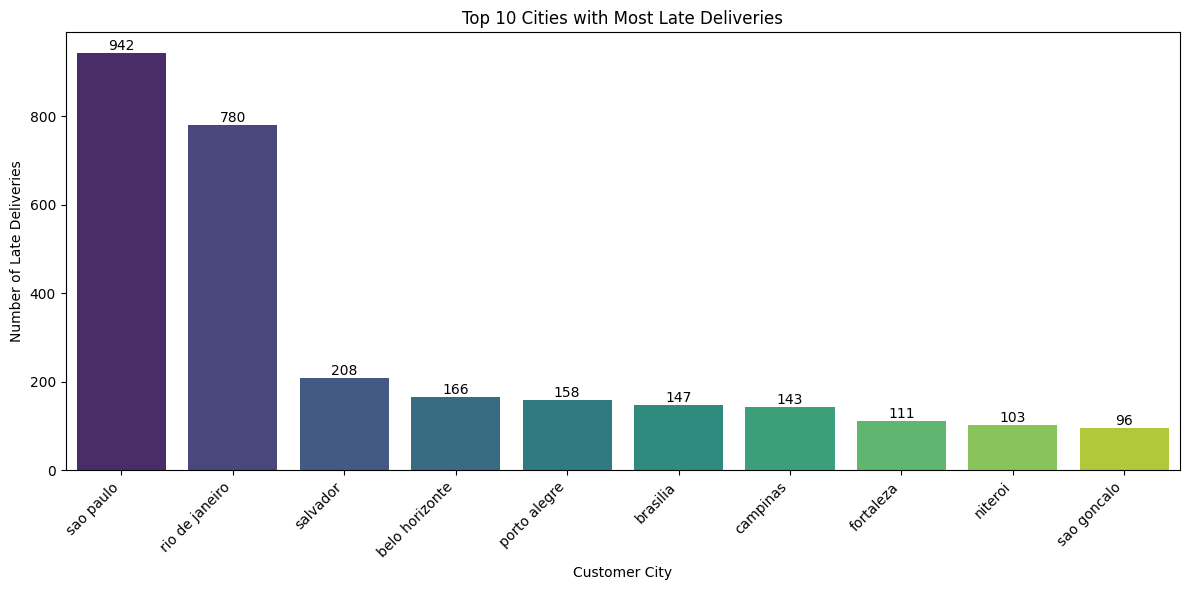

In [ ]:
# aggregate based on 'customer_city' to see total counts
city_counts = df_late_customer.groupby('customer_city').size().sort_values(ascending=False)

# Select the top 10 cities
top_10_cities = city_counts.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer City')
plt.ylabel('Number of Late Deliveries')
plt.title('Top 10 Cities with Most Late Deliveries')
plt.tight_layout()

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

/tmp/ipython-input-1982805845.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=top_10_zipcode.values, palette='viridis')


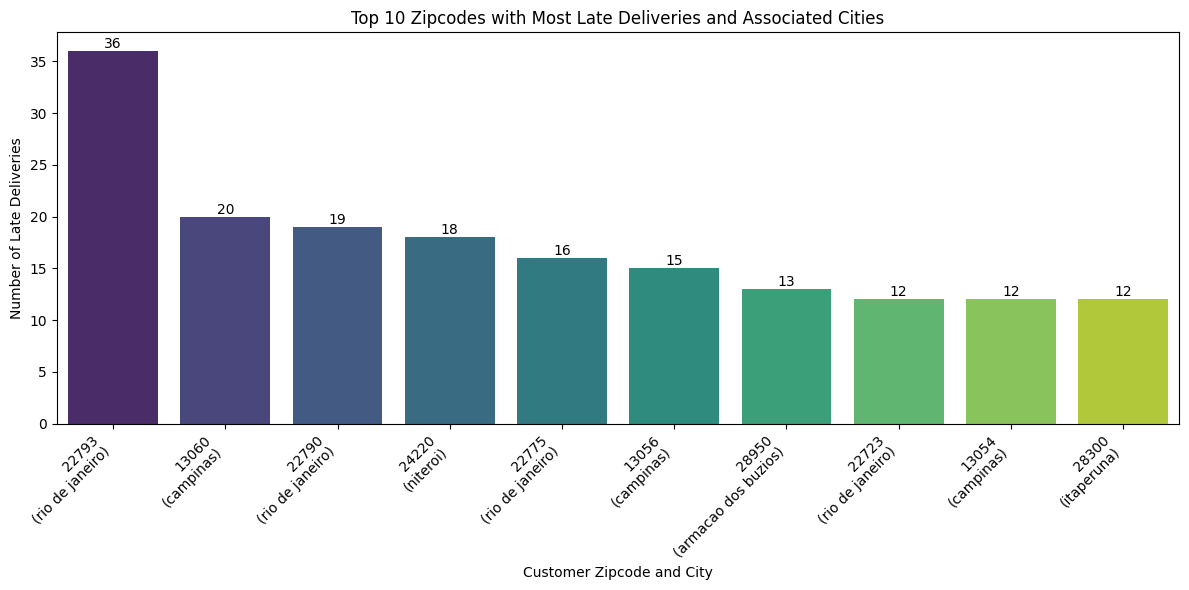

In [ ]:
# aggregate based on 'customer_zip_code_prefix' to see total counts
zipcode_counts = df_late_customer.groupby('customer_zip_code_prefix').size().sort_values(ascending=False)

# select the top 10 zipcodes
top_10_zipcode = zipcode_counts.head(10)

# get the city for each of the top 10 zipcodes
# Need to handle cases where a zipcode might have multiple cities in the geolocation data
zipcode_city_mapping = df_late_customer[df_late_customer['customer_zip_code_prefix'].isin(top_10_zipcode.index)].groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()

# Create labels with zipcode and city
labels = [f"{zipcode}\n({zipcode_city_mapping.get(zipcode, 'N/A')})" for zipcode in top_10_zipcode.index]

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=top_10_zipcode.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Zipcode and City')
plt.ylabel('Number of Late Deliveries')
plt.title('Top 10 Zipcodes with Most Late Deliveries and Associated Cities')
plt.tight_layout()

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## 3. Total dataset

In [ ]:
df_full_customer = pd.merge(df_full, df_customer, on='customer_id', how='left')


In [ ]:
# get the city for all zipcodes in df_full_customer
all_zipcode_city_mapping_full = df_full_customer.groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()

# display the mapping
display(all_zipcode_city_mapping_full)

{1003: 'sao paulo',
 1004: 'sao paulo',
 1005: 'sao paulo',
 1006: 'sao paulo',
 1007: 'sao paulo',
 1008: 'sao paulo',
 1009: 'sao paulo',
 1011: 'sao paulo',
 1012: 'sao paulo',
 1013: 'sao paulo',
 1014: 'sao paulo',
 1015: 'sao paulo',
 1016: 'sao paulo',
 1017: 'sao paulo',
 1019: 'sao paulo',
 1020: 'sao paulo',
 1021: 'sao paulo',
 1022: 'sao paulo',
 1023: 'sao paulo',
 1024: 'sao paulo',
 1025: 'sao paulo',
 1026: 'sao paulo',
 1027: 'sao paulo',
 1030: 'sao paulo',
 1031: 'sao paulo',
 1032: 'sao paulo',
 1033: 'sao paulo',
 1035: 'sao paulo',
 1036: 'sao paulo',
 1037: 'sao paulo',
 1038: 'sao paulo',
 1041: 'sao paulo',
 1042: 'sao paulo',
 1043: 'sao paulo',
 1044: 'sao paulo',
 1045: 'sao paulo',
 1046: 'sao paulo',
 1047: 'sao paulo',
 1048: 'sao paulo',
 1049: 'sao paulo',
 1050: 'sao paulo',
 1102: 'sao paulo',
 1103: 'sao paulo',
 1105: 'sao paulo',
 1106: 'sao paulo',
 1107: 'sao paulo',
 1108: 'sao paulo',
 1120: 'sao paulo',
 1121: 'sao paulo',
 1122: 'sao paulo',


In [ ]:
# check for zip codes associated with more than one city
zipcodes_with_multiple_cities_full = {zipcode: cities for zipcode, cities in all_zipcode_city_mapping_full.items() if ',' in cities}

if zipcodes_with_multiple_cities_full:
    print("Zip codes associated with more than one city:")
    display(zipcodes_with_multiple_cities_full)
else:
    print("Each zip code is associated with only one city in the df_late_customer DataFrame.")

Zip codes associated with more than one city:


{6806: 'embu das artes, embu',
 6810: 'embu das artes, embu',
 6813: 'embu das artes, embu',
 6814: 'embu das artes, embu',
 6823: 'embu das artes, embu',
 6824: 'embu das artes, embu',
 6826: 'embu, embu das artes',
 6835: 'embu das artes, embu',
 13450: "santa barbara d oeste, santa barbara d'oeste",
 13453: "santa barbara d oeste, santa barbara d'oeste",
 13454: "santa barbara d'oeste, santa barbara d oeste",
 13806: 'mogi mirim, mogi-mirim',
 13820: 'jaguariuna, monte alegre do sul',
 13910: 'jaguariuna, monte alegre do sul',
 15650: "estrela d oeste, estrela d'oeste",
 15720: "palmeira d'oeste, palmeira d oeste",
 23970: 'parati, paraty',
 28695: 'papucaia, cachoeiras de macacu',
 36576: 'vicosa, porto firme',
 37530: 'brazopolis, brasopolis',
 37925: 'piumhii, piumhi',
 38749: 'silvano, sao benedito',
 42840: 'abrantes, camacari',
 42850: "dias d'avila, dias d avila",
 45816: "porto seguro, arraial d'ajuda, arraial d ajuda",
 48355: 'apora, itamira',
 55485: 'santo antonio das qu

/tmp/ipython-input-3505240743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_cities_full.index, y=top_10_cities_full.values, palette='viridis')


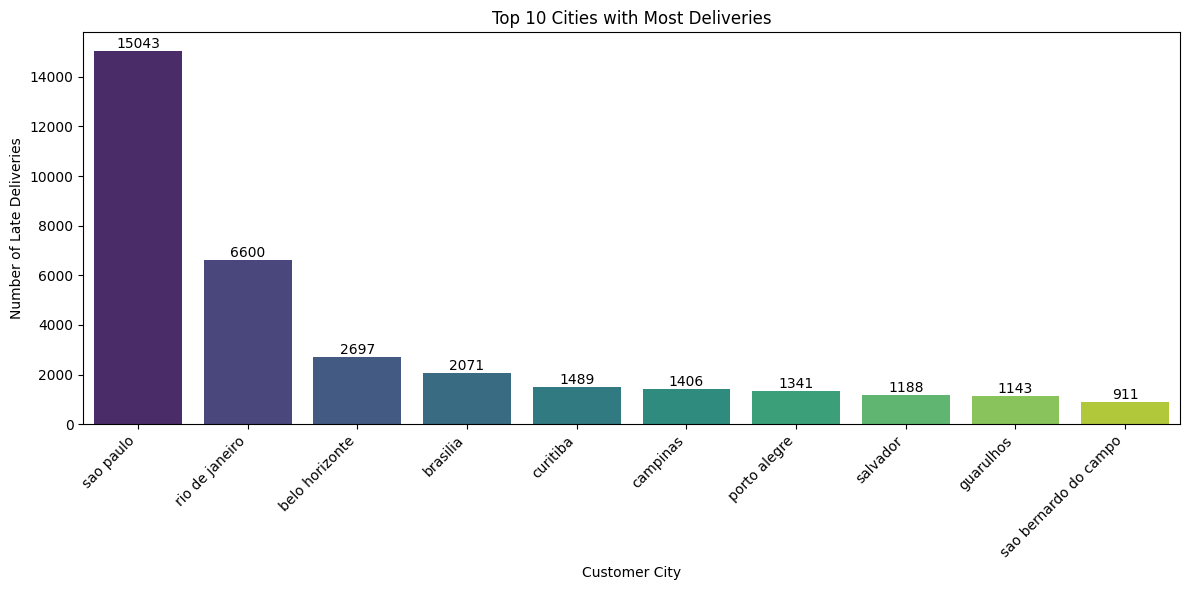

In [ ]:
# aggregate based on 'customer_city' to see total counts
city_counts_full = df_full_customer.groupby('customer_city').size().sort_values(ascending=False)

# Select the top 10 cities
top_10_cities_full = city_counts_full.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_cities_full.index, y=top_10_cities_full.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer City')
plt.ylabel('Number of Late Deliveries')
plt.title('Top 10 Cities with Most Deliveries')
plt.tight_layout()

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

/tmp/ipython-input-2617843611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=top_10_zipcode_full.values, palette='viridis')


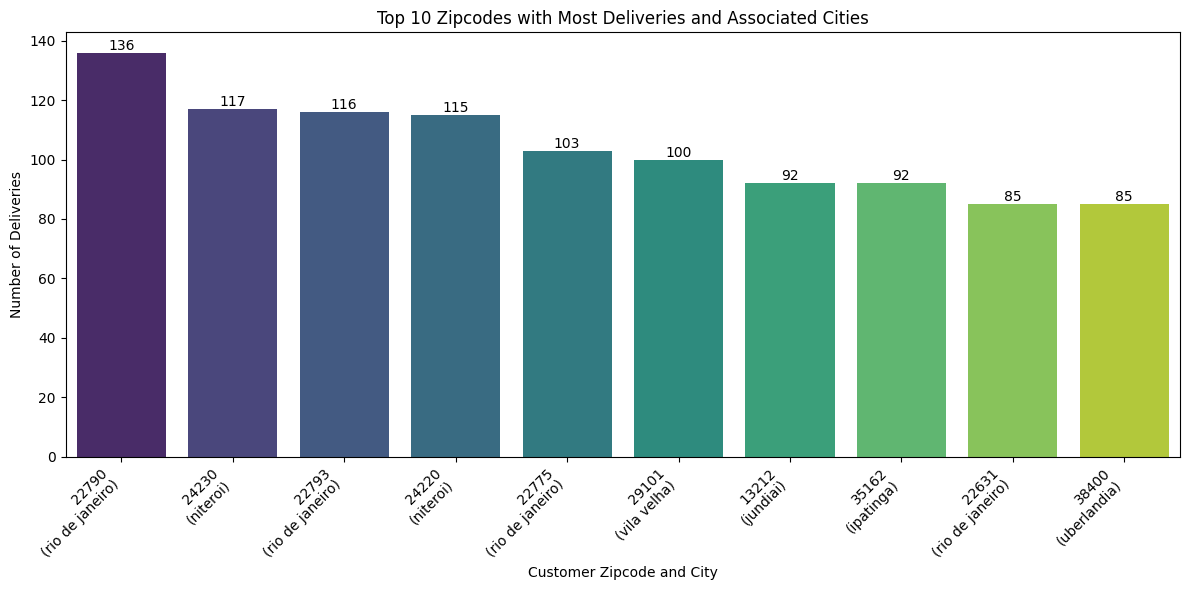

In [ ]:
# aggregate based on 'customer_zip_code_prefix' to see total counts
zipcode_counts_full = df_full_customer.groupby('customer_zip_code_prefix').size().sort_values(ascending=False)

# select the top 10 zipcodes
top_10_zipcode_full = zipcode_counts_full.head(10)
# get the city for each of the top 10 zipcodes
# Need to handle cases where a zipcode might have multiple cities in the geolocation data
zipcode_city_mapping_full = df_full_customer[df_full_customer['customer_zip_code_prefix'].isin(top_10_zipcode_full.index)].groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()

# Create labels with zipcode and city
labels = [f"{zipcode}\n({zipcode_city_mapping_full.get(zipcode, 'N/A')})" for zipcode in top_10_zipcode_full.index]

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=top_10_zipcode_full.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Zipcode and City')
plt.ylabel('Number of Deliveries')
plt.title('Top 10 Zipcodes with Most Deliveries and Associated Cities')
plt.tight_layout()

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
# calculate the total number of deliveries for each city
total_deliveries_by_city = df_full_customer.groupby('customer_city').size()

# calculate the number of late deliveries for each city
late_deliveries_by_city = df_late_customer.groupby('customer_city').size()

# calculate the on-time delivery rate for each city
# Handle cities with no late deliveries (will have 0 late deliveries) and no deliveries (rate is undefined, can be treated as 0 or excluded)
on_time_delivery_rate_by_city = ((total_deliveries_by_city - late_deliveries_by_city) / total_deliveries_by_city).fillna(0)

# Display the on-time delivery rates
display(on_time_delivery_rate_by_city.sort_values(ascending=False))

,0
customer_city,
franco da rocha,0.990741
itatiba,0.989691
vinhedo,0.988889
assis,0.988095
mogi mirim,0.986667
...,...
itatiba do sul,0.000000
itarema,0.000000
itobi,0.000000


In [ ]:
# Get the on-time delivery rates for the top 10 cities with the most late deliveries
top_10_cities_on_time_rate = on_time_delivery_rate_by_city[top_10_cities.index]

# Display the top 10 cities' on-time delivery rates
display(top_10_cities_on_time_rate.sort_values(ascending=True))

,0
customer_city,
sao goncalo,0.750649
fortaleza,0.820388
salvador,0.824916
niteroi,0.875152
rio de janeiro,0.881818
porto alegre,0.882177
campinas,0.898293
brasilia,0.929020
sao paulo,0.937380


In [ ]:
# calculate the total number of deliveries for each zipcode
total_deliveries_by_zipcode = df_full_customer.groupby('customer_zip_code_prefix').size()

# calculate the number of late deliveries for each zipcode
late_deliveries_by_zipcode = df_late_customer.groupby('customer_zip_code_prefix').size()

# calculate the on-time delivery rate for each zipcode
# Handle cities with no late deliveries (will have 0 late deliveries) and no deliveries (rate is undefined, can be treated as 0 or excluded)
on_time_delivery_rate_by_zipcode = ((total_deliveries_by_zipcode - late_deliveries_by_zipcode) / total_deliveries_by_zipcode).fillna(0)

# Display the on-time delivery rates
display(on_time_delivery_rate_by_zipcode.sort_values(ascending=True))

,0
customer_zip_code_prefix,
54230,0.000000
53620,0.000000
53625,0.000000
53635,0.000000
53700,0.000000
...,...
30575,0.980392
15600,0.980769
13040,0.982143


In [ ]:
# Get the on-time delivery rates for the top 10 cities with the most late deliveries
top_10_zipcode_on_time_rate = on_time_delivery_rate_by_zipcode[top_10_zipcode.index]

# Display the top 10 cities' on-time delivery rates
display(top_10_zipcode_on_time_rate.sort_values(ascending=True))

,0
customer_zip_code_prefix,
28950,0.535714
13056,0.625000
22793,0.689655
13060,0.692308
13054,0.692308
22723,0.707317
28300,0.739130
24220,0.843478
22775,0.844660


> It would be more accurate to see the late proportion by zipcode rather than a city.

## 1. Proportion

In [ ]:
# Get the on-time delivery rates for the top 10 cities with the most late deliveries
top_10_zipcode_on_time_rate = on_time_delivery_rate_by_zipcode[top_10_zipcode.index]

# Display the top 10 cities' on-time delivery rates
display(top_10_zipcode_on_time_rate.sort_values(ascending=False))

,0
customer_zip_code_prefix,
22790,0.860294
22775,0.844660
24220,0.843478
28300,0.739130
22723,0.707317
13060,0.692308
13054,0.692308
22793,0.689655
13056,0.625000


/tmp/ipython-input-2185574796.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=plot_data.values, palette='viridis')


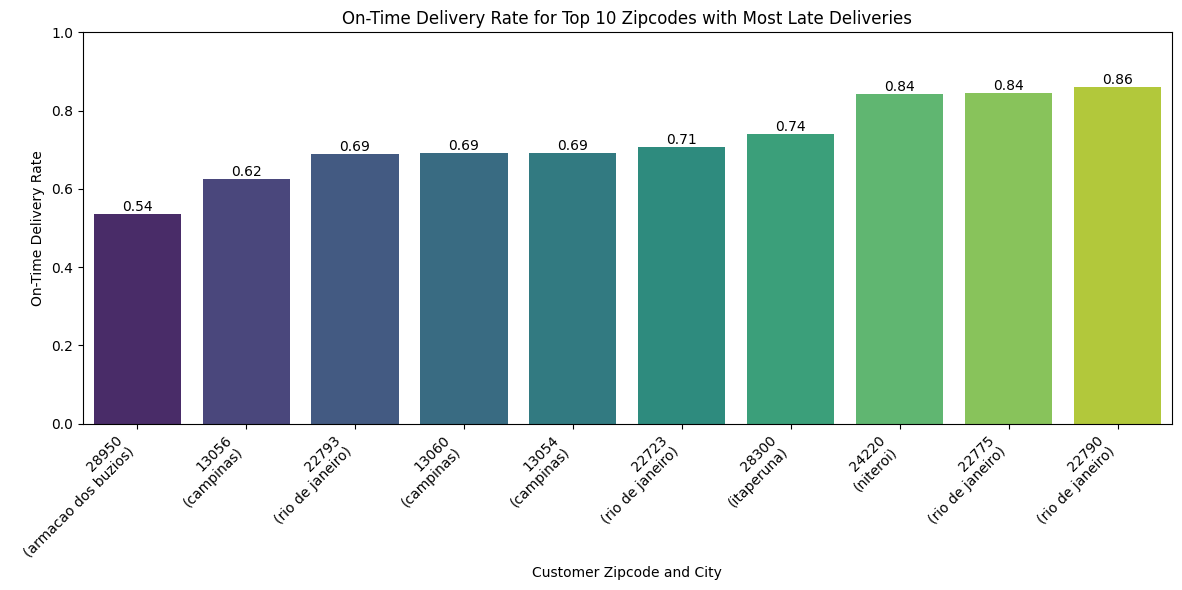

In [ ]:
# Sort the on-time delivery rates in ascending order for better visualization of low rates
plot_data = top_10_zipcode_on_time_rate.sort_values(ascending=True)

# Get the city for each of the top 10 zipcodes for labels
zipcode_city_mapping = df_late_customer[df_late_customer['customer_zip_code_prefix'].isin(plot_data.index)].groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()

# Create labels with zipcode and city
labels = [f"{zipcode}\n({zipcode_city_mapping.get(zipcode, 'N/A')})" for zipcode in plot_data.index]

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=plot_data.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Zipcode and City')
plt.ylabel('On-Time Delivery Rate')
plt.title('On-Time Delivery Rate for Top 10 Zipcodes with Most Late Deliveries')
plt.ylim(0, 1) # Ensure y-axis shows rate from 0 to 1
plt.tight_layout()

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

## 2. Counts

/tmp/ipython-input-646757699.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=top_10_zipcode_counts.values, palette='viridis')


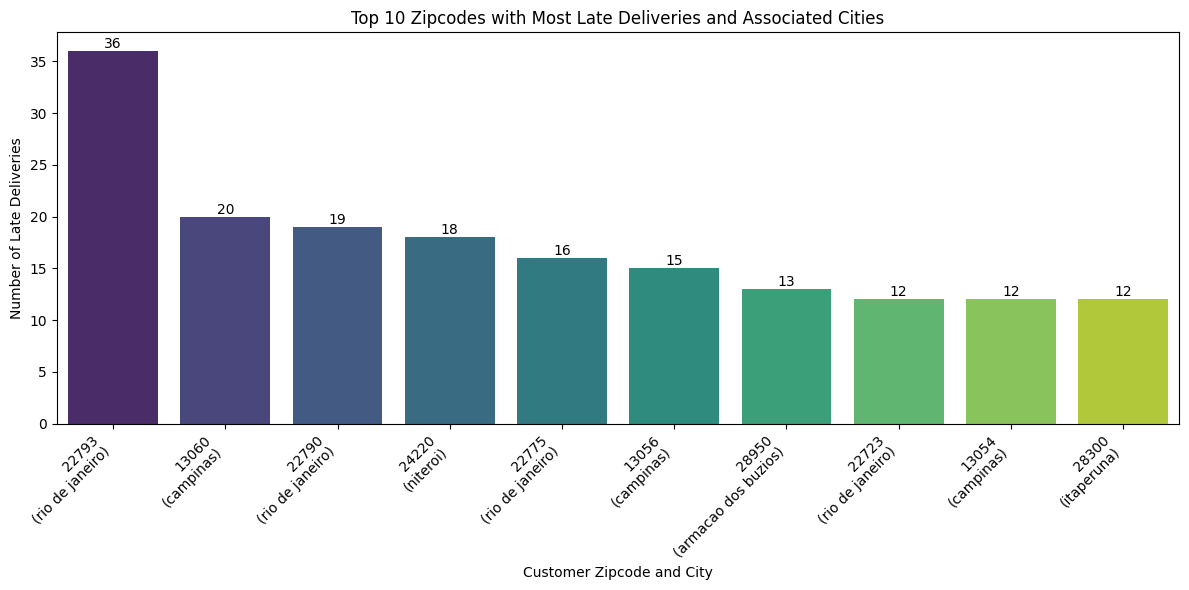

In [ ]:
# aggregate based on 'customer_zip_code_prefix' to see total counts
zipcode_counts = df_late_customer.groupby('customer_zip_code_prefix').size().sort_values(ascending=False)

# select the top 10 zipcodes
top_10_zipcode_counts = zipcode_counts.head(10)

# get the city for each of the top 10 zipcodes
# Need to handle cases where a zipcode might have multiple cities in the geolocation data
zipcode_city_mapping = df_late_customer[df_late_customer['customer_zip_code_prefix'].isin(top_10_zipcode.index)].groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()

# Create labels with zipcode and city
labels = [f"{zipcode}\n({zipcode_city_mapping.get(zipcode, 'N/A')})" for zipcode in top_10_zipcode.index]

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=top_10_zipcode_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Zipcode and City')
plt.ylabel('Number of Late Deliveries')
plt.title('Top 10 Zipcodes with Most Late Deliveries and Associated Cities')
plt.tight_layout()

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
# Display the top 10 cities' on-time delivery counts
display(top_10_zipcode_counts.sort_values(ascending=False))

,0
customer_zip_code_prefix,
22793,36
13060,20
22790,19
24220,18
22775,16
13056,15
28950,13
22723,12
13054,12


## 3. Misc

/tmp/ipython-input-1919962343.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='late_delivery_counts', data=late_combined_df, ax=ax1, palette='viridis')
/tmp/ipython-input-1919962343.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


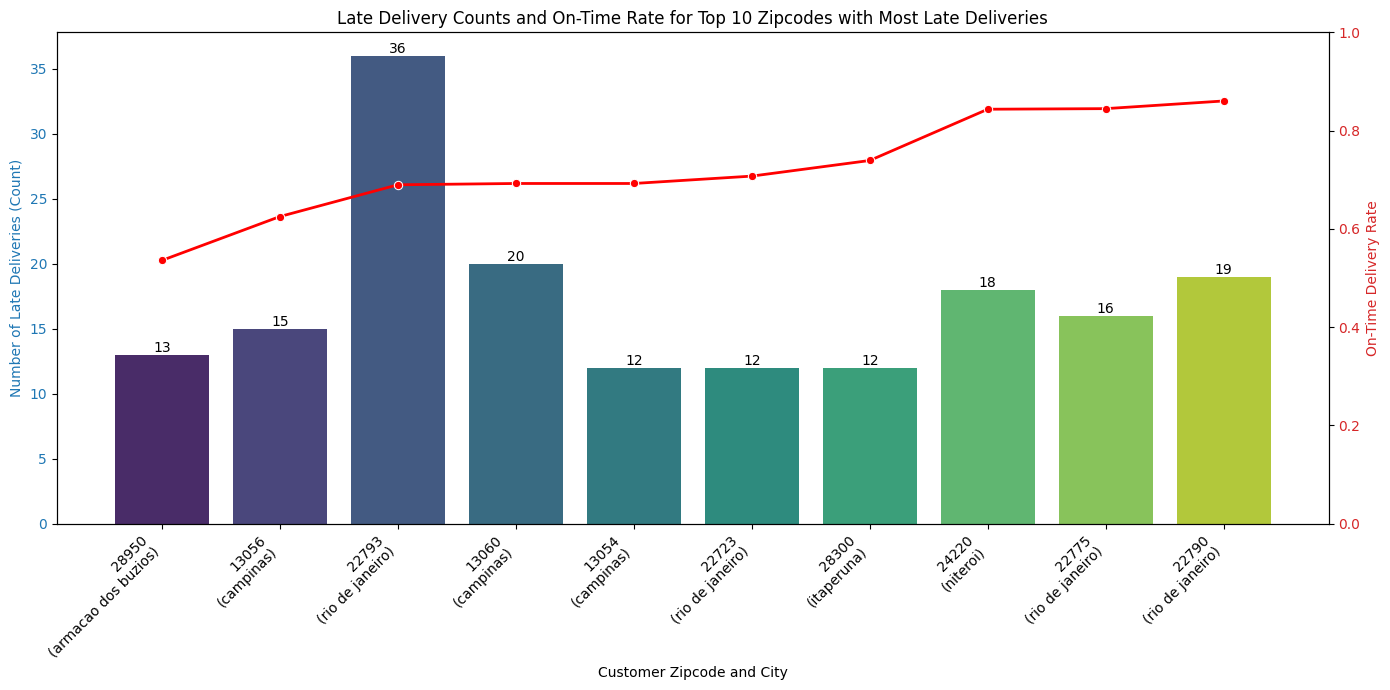

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming plot_data contains top_10_zipcode_on_time_rate sorted ascending
# The index of plot_data are the zipcodes
zipcodes_for_plot = plot_data.index

# Get the corresponding counts for these zipcodes
counts_for_plot = top_10_zipcode_counts[zipcodes_for_plot]

# Create a DataFrame to combine the data for plotting
late_combined_df = pd.DataFrame({
    'zipcode': zipcodes_for_plot,
    'late_delivery_counts': counts_for_plot.values,
    'on_time_rate': plot_data.values
})

# Get city mapping for labels, using the already available zipcode_city_mapping
# Ensure the mapping is based on the zipcodes in combined_df
zipcode_city_mapping_for_plot = df_late_customer[df_late_customer['customer_zip_code_prefix'].isin(late_combined_df['zipcode'])].groupby('customer_zip_code_prefix')['customer_city'].agg(lambda x: ', '.join(x.unique())).to_dict()
late_combined_df['label'] = [f"{zipcode}\n({zipcode_city_mapping_for_plot.get(zipcode, 'N/A')})" for zipcode in late_combined_df['zipcode']]

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for late delivery counts on ax1
sns.barplot(x='label', y='late_delivery_counts', data=late_combined_df, ax=ax1, palette='viridis')
ax1.set_xlabel('Customer Zipcode and City')
ax1.set_ylabel('Number of Late Deliveries (Count)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Late Delivery Counts and On-Time Rate for Top 10 Zipcodes with Most Late Deliveries')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container)

# Create a second y-axis for on-time rate
ax2 = ax1.twinx()
sns.lineplot(x='label', y='on_time_rate', data=late_combined_df, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('On-Time Delivery Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1) # Rate should be between 0 and 1

plt.tight_layout()
plt.show()

In [ ]:
# display 'late_combined_df'
display(late_combined_df)

,zipcode,late_delivery_counts,on_time_rate,label
0,28950,13,0.535714,28950\n(armacao dos buzios)
1,13056,15,0.625000,13056\n(campinas)
2,22793,36,0.689655,22793\n(rio de janeiro)
3,13060,20,0.692308,13060\n(campinas)
4,13054,12,0.692308,13054\n(campinas)
5,22723,12,0.707317,22723\n(rio de janeiro)
6,28300,12,0.739130,28300\n(itaperuna)
7,24220,18,0.843478,24220\n(niteroi)
8,22775,16,0.844660,22775\n(rio de janeiro)
9,22790,19,0.860294,22790\n(rio de janeiro)


In [ ]:
# Sort the combined_df by 'on_time_rate' in ascending order
sorted_combined_df = late_combined_df.sort_values(by='on_time_rate', ascending=True)

# Display the sorted DataFrame
display(sorted_combined_df)

,zipcode,late_delivery_counts,on_time_rate,label
0,28950,13,0.535714,28950\n(armacao dos buzios)
1,13056,15,0.625000,13056\n(campinas)
2,22793,36,0.689655,22793\n(rio de janeiro)
3,13060,20,0.692308,13060\n(campinas)
4,13054,12,0.692308,13054\n(campinas)
5,22723,12,0.707317,22723\n(rio de janeiro)
6,28300,12,0.739130,28300\n(itaperuna)
7,24220,18,0.843478,24220\n(niteroi)
8,22775,16,0.844660,22775\n(rio de janeiro)
9,22790,19,0.860294,22790\n(rio de janeiro)


In [ ]:
# mean of late deliveries
avg_late_deliveries_counts = late_combined_df['late_delivery_counts'].mean()
print(f"The average number of late deliveries among the top 10 zip code is {avg_late_deliveries_counts}")

The average number of late deliveries among the top 10 zip code is 17.3


In [ ]:
# mean of on_time_rate
avg_on_time_rate = late_combined_df['on_time_rate'].mean()
print(f"The average on time delivery rate among the top 10 zip code is {avg_on_time_rate.round(2)}")

The average on time delivery rate among the top 10 zip code is 0.72


> Top 10 zip codes ranked by total late deliveries

## Geolocation Feature Engineering and Analysis (Using Customer Data)

### Subtask:
Calculate and analyze late delivery rates by customer zip code and state, and visualize the findings.


**Reasoning**:
I will calculate the total number of deliveries and the number of late deliveries for each unique customer zip code and state from `df_full_customer`. Then, I'll compute the 'late_delivery_rate' for each, handling potential division by zero by filling NaN values with 0, and store the results in `late_rate_by_zipcode` and `late_rate_by_state` Series respectively.



In [ ]:
# Calculate total and late deliveries by zipcode
total_deliveries_by_zipcode = df_full_customer.groupby('customer_zip_code_prefix').size()
late_deliveries_by_zipcode = df_full_customer[df_full_customer['isLate'] == 1].groupby('customer_zip_code_prefix').size()

# Calculate late delivery rate by zipcode, filling NaN (no late deliveries) with 0
late_rate_by_zipcode = (late_deliveries_by_zipcode / total_deliveries_by_zipcode).fillna(0)

# Calculate total and late deliveries by state
total_deliveries_by_state = df_full_customer.groupby('customer_state').size()
late_deliveries_by_state = df_full_customer[df_full_customer['isLate'] == 1].groupby('customer_state').size()

# Calculate late delivery rate by state, filling NaN (no late deliveries) with 0
late_rate_by_state = (late_deliveries_by_state / total_deliveries_by_state).fillna(0)

print("Late delivery rates by zipcode and state calculated successfully.")

display("Late delivery rates by Zipcode (top 10):")
display(late_rate_by_zipcode.sort_values(ascending=False).head(10))
display("Late delivery rates by State (top 10):")
display(late_rate_by_state.sort_values(ascending=False).head(10))

Late delivery rates by zipcode and state calculated successfully.


'Late delivery rates by Zipcode (top 10):'

,0
customer_zip_code_prefix,
97185,1.0
97385,1.0
99880,1.0
57240,1.0
57242,1.0
57301,1.0
57605,1.0
57620,1.0
28927,1.0


'Late delivery rates by State (top 10):'

,0
customer_state,
AL,0.239295
MA,0.196927
PI,0.159664
CE,0.153365
SE,0.152239
BA,0.140356
RJ,0.134759
TO,0.127737
PA,0.123679


**Reasoning**:
I will identify the top 10 and bottom 10 zip codes based on their late delivery rates using the `late_rate_by_zipcode` Series, then prepare these for visualization.



Identifying top and bottom 10 zip codes by late delivery rate...
Top 10 late zip codes:


,0
customer_zip_code_prefix,
97185,1.0
97385,1.0
99880,1.0
57240,1.0
57242,1.0
57301,1.0
57605,1.0
57620,1.0
28927,1.0



Bottom 10 late zip codes:


,0
customer_zip_code_prefix,
53110,0.0
52171,0.0
52191,0.0
52221,0.0
52280,0.0
52390,0.0
53010,0.0
53020,0.0
53050,0.0


/tmp/ipython-input-3132533173.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels_zip, y=zipcodes_to_plot.values, palette='coolwarm')


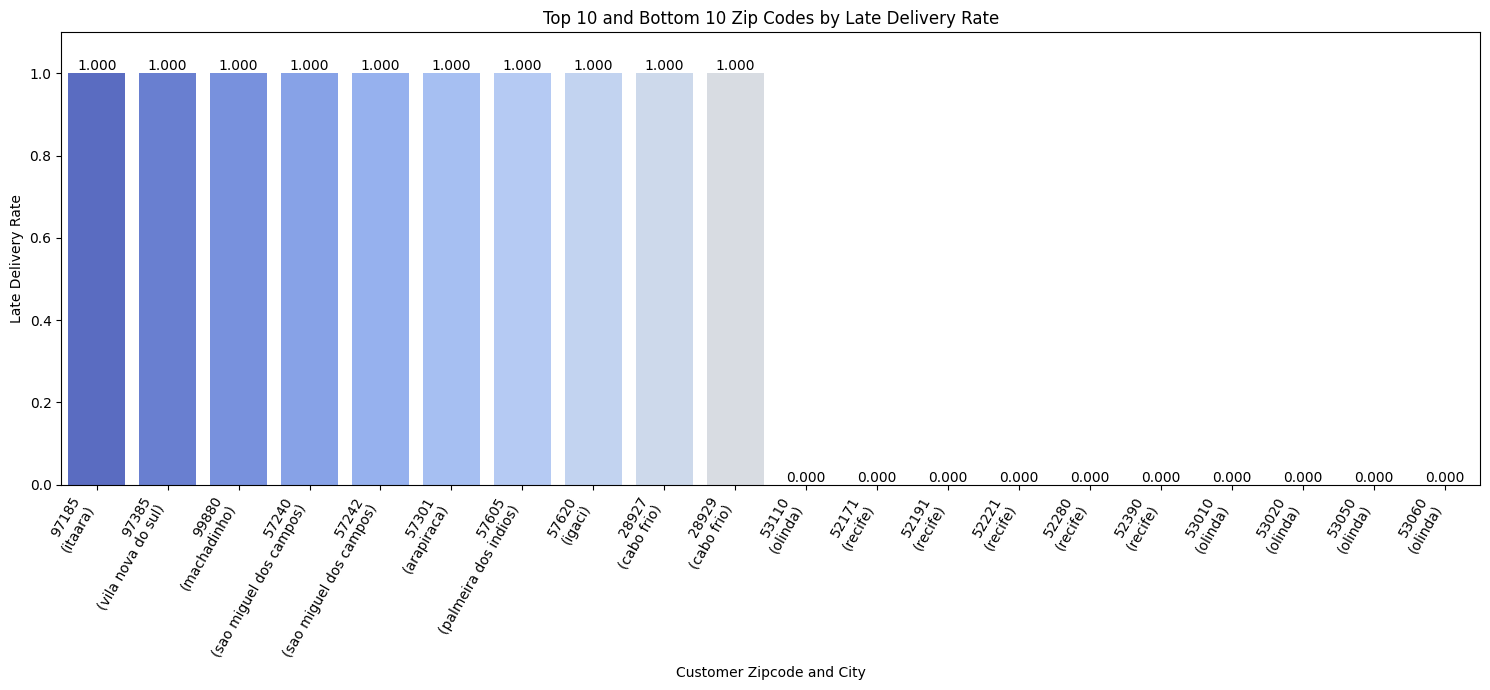

In [ ]:
print('Identifying top and bottom 10 zip codes by late delivery rate...')

# Identify top 10 zip codes with highest late delivery rate
top_10_late_zipcodes = late_rate_by_zipcode.sort_values(ascending=False).head(10)

# Identify bottom 10 zip codes with lowest late delivery rate
# Exclude zip codes with 0 total deliveries (where late_rate_by_zipcode might be NaN before fillna(0) and represent no data)
# Filter out zip codes where the rate is 0 because there were no late deliveries (potentially small sample size)
# To make the 'bottom 10' more meaningful, we can consider zip codes with a non-zero total delivery count.
meaningful_late_rate_by_zipcode = late_rate_by_zipcode[total_deliveries_by_zipcode > 0]
bottom_10_late_zipcodes = meaningful_late_rate_by_zipcode.sort_values(ascending=True).head(10)

print('Top 10 late zip codes:')
display(top_10_late_zipcodes)
print('\nBottom 10 late zip codes:')
display(bottom_10_late_zipcodes)

# Combine for plotting
zipcodes_to_plot = pd.concat([top_10_late_zipcodes, bottom_10_late_zipcodes])

# Get city mapping for labels, reusing the already available `all_zipcode_city_mapping_full`
# Filter the mapping to only include zip codes we are plotting
zipcode_city_mapping_for_plot_zip = {zipcode: all_zipcode_city_mapping_full.get(zipcode, 'N/A') for zipcode in zipcodes_to_plot.index}

# Create labels with zipcode and city
labels_zip = [f"{zipcode}\n({zipcode_city_mapping_for_plot_zip.get(zipcode, 'N/A')})" for zipcode in zipcodes_to_plot.index]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=labels_zip, y=zipcodes_to_plot.values, palette='coolwarm')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Customer Zipcode and City')
plt.ylabel('Late Delivery Rate')
plt.title('Top 10 and Bottom 10 Zip Codes by Late Delivery Rate')
plt.ylim(0, 1.1) # Ensure y-axis shows rate clearly

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.tight_layout()
plt.show()


**Reasoning**:
I will identify the top 10 and bottom 10 states based on their late delivery rates using the `late_rate_by_state` Series and then visualize these rates in a bar plot.



Identifying top and bottom 10 states by late delivery rate...
Top 10 late states:


,0
customer_state,
AL,0.239295
MA,0.196927
PI,0.159664
CE,0.153365
SE,0.152239
BA,0.140356
RJ,0.134759
TO,0.127737
PA,0.123679



Bottom 10 late states:


,0
customer_state,
RO,0.028807
AC,0.037500
AM,0.041379
AP,0.044776
PR,0.049970
MG,0.056118
SP,0.058931
MT,0.067720
DF,0.070673


/tmp/ipython-input-748773731.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=states_to_plot.index, y=states_to_plot.values, palette='coolwarm')


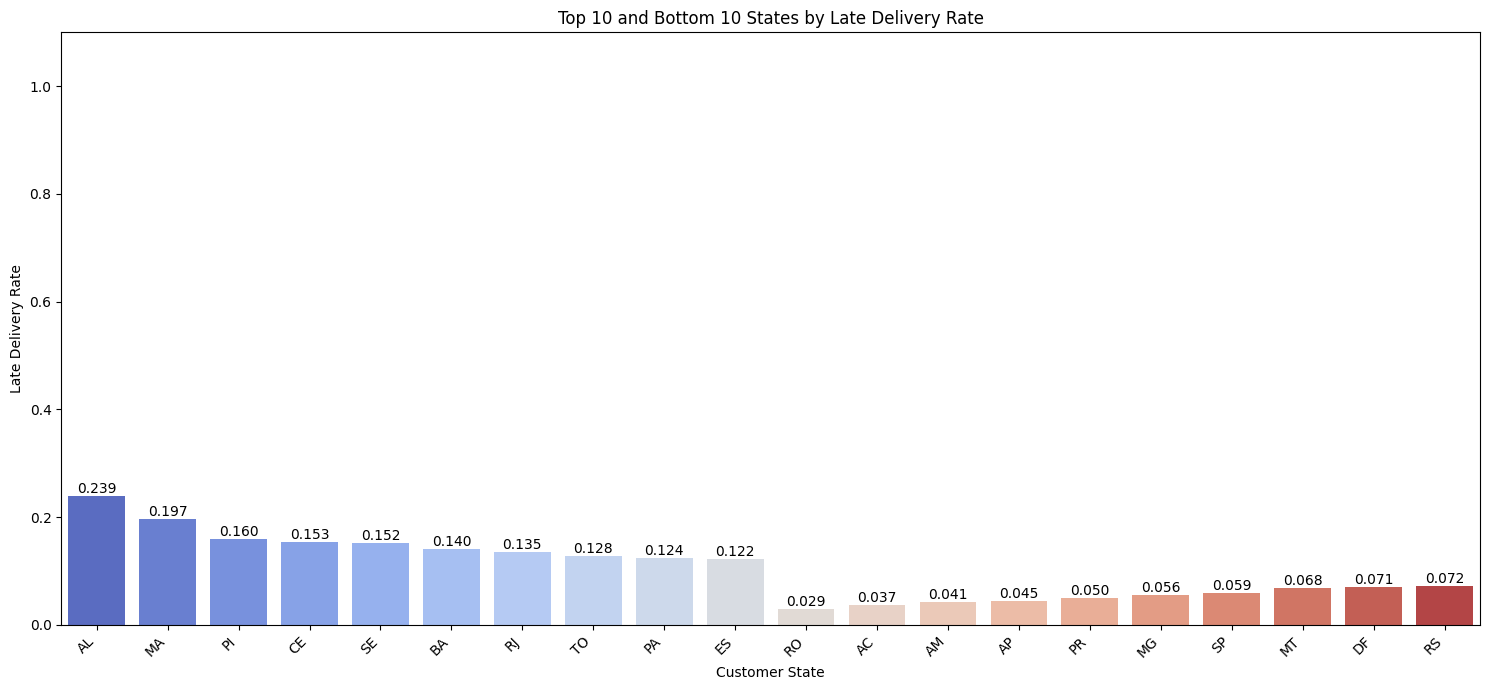

In [ ]:
print('Identifying top and bottom 10 states by late delivery rate...')

# Identify top 10 states with highest late delivery rate
top_10_late_states = late_rate_by_state.sort_values(ascending=False).head(10)

# Identify bottom 10 states with lowest late delivery rate
# Exclude states with 0 total deliveries (where late_rate_by_state might be NaN before fillna(0) and represent no data)
# To make the 'bottom 10' more meaningful, we can consider states with a non-zero total delivery count.
meaningful_late_rate_by_state = late_rate_by_state[total_deliveries_by_state > 0]
bottom_10_late_states = meaningful_late_rate_by_state.sort_values(ascending=True).head(10)

print('Top 10 late states:')
display(top_10_late_states)
print('\nBottom 10 late states:')
display(bottom_10_late_states)

# Combine for plotting
states_to_plot = pd.concat([top_10_late_states, bottom_10_late_states])

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=states_to_plot.index, y=states_to_plot.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer State')
plt.ylabel('Late Delivery Rate')
plt.title('Top 10 and Bottom 10 States by Late Delivery Rate')
plt.ylim(0, 1.1) # Ensure y-axis shows rate clearly

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.tight_layout()
plt.show()

Identifying top and bottom 10 states by late delivery rate...
Top 10 late states:


,0
customer_state,
AL,0.239295
MA,0.196927
PI,0.159664
CE,0.153365
SE,0.152239
BA,0.140356
RJ,0.134759
TO,0.127737
PA,0.123679



Bottom 10 late states:


,0
customer_state,
RO,0.028807
AC,0.037500
AM,0.041379
AP,0.044776
PR,0.049970
MG,0.056118
SP,0.058931
MT,0.067720
DF,0.070673


/tmp/ipython-input-3278865445.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_late_deliveries', data=combined_states_df, ax=ax1, palette='viridis')
/tmp/ipython-input-3278865445.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


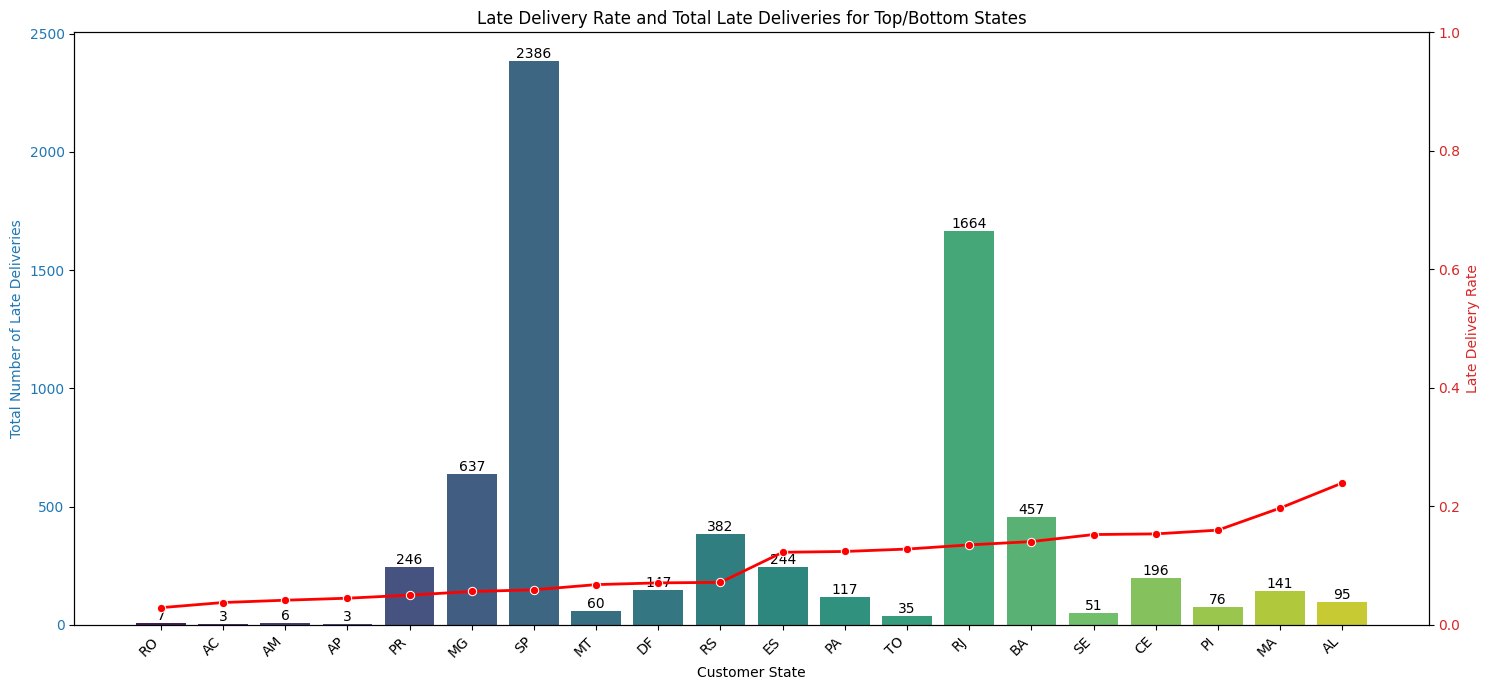

In [ ]:
print('Identifying top and bottom 10 states by late delivery rate...')

# Identify top 10 states with highest late delivery rate
top_10_late_states = late_rate_by_state.sort_values(ascending=False).head(10)

# Identify bottom 10 states with lowest late delivery rate
# Exclude states with 0 total deliveries (where late_rate_by_state might be NaN before fillna(0) and represent no data)
# To make the 'bottom 10' more meaningful, we can consider states with a non-zero total delivery count.
meaningful_late_rate_by_state = late_rate_by_state[total_deliveries_by_state > 0]
bottom_10_late_states = meaningful_late_rate_by_state.sort_values(ascending=True).head(10)

print('Top 10 late states:')
display(top_10_late_states)
print('\nBottom 10 late states:')
display(bottom_10_late_states)

# Combine for plotting (rates)
states_to_plot_rates = pd.concat([top_10_late_states, bottom_10_late_states])

# Get total late deliveries for these states
late_deliveries_for_plot = late_deliveries_by_state[states_to_plot_rates.index].fillna(0)

# Create a DataFrame to combine the data for plotting
combined_states_df = pd.DataFrame({
    'state': states_to_plot_rates.index,
    'late_delivery_rate': states_to_plot_rates.values,
    'total_late_deliveries': late_deliveries_for_plot.values
})

# Sort by late delivery rate to match the order of states_to_plot_rates
combined_states_df = combined_states_df.sort_values(by='late_delivery_rate', ascending=True)

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar plot for total late deliveries on ax1
sns.barplot(x='state', y='total_late_deliveries', data=combined_states_df, ax=ax1, palette='viridis')
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Total Number of Late Deliveries', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Late Delivery Rate and Total Late Deliveries for Top/Bottom States')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container)

# Create a second y-axis for late delivery rate
ax2 = ax1.twinx()
sns.lineplot(x='state', y='late_delivery_rate', data=combined_states_df, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Late Delivery Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0, 1) # Rate should be between 0 and 1

plt.tight_layout()
plt.show()

**Reasoning**:
I will merge the calculated `late_rate_by_zipcode` into the main `df_full_customer` DataFrame to add the 'zipcode_late_rate' as a new feature for each order, which can be used for modeling.



In [ ]:
print("Merging 'late_rate_by_zipcode' into 'df_full_customer'...")

# Convert Series to DataFrame for merging, if not already.
# late_rate_by_zipcode is already a Series with customer_zip_code_prefix as index.
# Let's rename the Series for clarity during merge.
late_rate_by_zipcode_df = late_rate_by_zipcode.rename('zipcode_late_rate').reset_index()

df_full_customer = pd.merge(
    df_full_customer,
    late_rate_by_zipcode_df,
    on='customer_zip_code_prefix',
    how='left'
)

# Verify the merge and check for any NaN values introduced (should be none if late_rate_by_zipcode was filled).
print('Merge complete. Checking for NaN values in new column...')
print(f"NaN values in 'zipcode_late_rate': {df_full_customer['zipcode_late_rate'].isnull().sum()}")

df_full_customer.head()

Merging 'late_rate_by_zipcode' into 'df_full_customer'...
Merge complete. Checking for NaN values in new column...
NaN values in 'zipcode_late_rate': 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_diff,order_stage,...,delivered_carrier_hour,delivered_customer_year,delivered_customer_month,delivered_customer_dayofweek,delivered_customer_hour,estimated_delivery_year,estimated_delivery_month,estimated_delivery_dayofweek,estimated_delivery_hour,zipcode_late_rate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.1,2.4,...,19,2017,10,1,21,2017,10,2,0,0.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.4,1.7,...,14,2018,8,1,15,2018,8,0,0,0.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.2,0.2,...,13,2018,8,4,18,2018,9,1,0,0.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,3.8,...,13,2017,12,5,0,2017,12,4,0,0.25
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.2,0.9,...,19,2018,2,4,18,2018,2,0,0,0.04


**Reasoning**:
I will merge the calculated `late_rate_by_state` into the main `df_full_customer` DataFrame to add the 'state_late_rate' as a new feature for each order, which can be used for modeling. This mirrors the previous step with zip codes.



In [ ]:
print("Merging 'late_rate_by_state' into 'df_full_customer'...")

# Convert Series to DataFrame for merging
late_rate_by_state_df = late_rate_by_state.rename('state_late_rate').reset_index()

df_full_customer = pd.merge(
    df_full_customer,
    late_rate_by_state_df,
    on='customer_state',
    how='left'
)

# Verify the merge and check for any NaN values introduced.
print('Merge complete. Checking for NaN values in new column...')
print(f"NaN values in 'state_late_rate': {df_full_customer['state_late_rate'].isnull().sum()}")

df_full_customer.head()

Merging 'late_rate_by_state' into 'df_full_customer'...
Merge complete. Checking for NaN values in new column...
NaN values in 'state_late_rate': 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_diff,order_stage,...,delivered_customer_year,delivered_customer_month,delivered_customer_dayofweek,delivered_customer_hour,estimated_delivery_year,estimated_delivery_month,estimated_delivery_dayofweek,estimated_delivery_hour,zipcode_late_rate,state_late_rate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.1,2.4,...,2017,10,1,21,2017,10,2,0,0.00,0.058931
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.4,1.7,...,2018,8,1,15,2018,8,0,0,0.00,0.140356
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.2,0.2,...,2018,8,4,18,2018,9,1,0,0.00,0.081758
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,3.8,...,2017,12,5,0,2017,12,4,0,0.25,0.107595
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.2,0.9,...,2018,2,4,18,2018,2,0,0,0.04,0.058931


# 5. Add seller id and item

In [ ]:
df_seller = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_sellers_dataset.csv')


In [ ]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df_item = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_order_items_dataset.csv')

In [ ]:
df_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# order by order_id
df_item = df_item.sort_values(by='order_id')
df_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# show how many of "" from order_id exist
order_id_to_check = "00018f77f2f0320c557190d7a144bdd3"
count = df_item[df_item['order_id'] == order_id_to_check].shape[0]
print(f"The order ID '{order_id_to_check}' appears {count} times in df_item.")

The order ID '00018f77f2f0320c557190d7a144bdd3' appears 1 times in df_item.


In [ ]:
# check duplicate order_id
dupe_order_id = df_item.order_id.duplicated().sum()
print(f"There are {dupe_order_id} duplicate order_id in df_item.")

There are 13984 duplicate order_id in df_item.


In [ ]:
# check duplicate sellet_id
dupe_seller_id = df_item.seller_id.duplicated().sum()
print(f"There are {dupe_seller_id} duplicate seller_id in df_item.")

There are 109555 duplicate seller_id in df_item.


In [ ]:
# check order_id

In [ ]:
# make a copy of df_item and keep only one order_id
df_item_copy = df_item.copy()
df_item_copy_order = df_item_copy.drop_duplicates(subset='order_id', keep='first')
df_item_copy_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# make a copy of df_item and keep only one seller_id
df_item_copy_2 = df_item.copy()
df_item_copy_seller = df_item_copy_2.drop_duplicates(subset='seller_id', keep='first')
df_item_copy_seller

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
111691,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.90,16.14
111812,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14
111998,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [ ]:
df_products = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_products_dataset.csv')

In [ ]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
